# Multilayer perceptron (MLP) for recognizing handwritten digits

Historically,
perceptron was the name given to a model having one single linear layer, and as a consequence, if it
has multiple layers, you would call it multilayer perceptron (MLP).

MNIST database of handwritten digits made up of a training set of 60,000 examples and a test set of 10,000 examples.
The training examples are annotated by humans with the correct answer. Each MNIST image is in gray scale, and it consists of 28 x 28 pixels.

In [1]:
from __future__ import print_function
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1) # for reproducibility

Using TensorFlow backend.


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

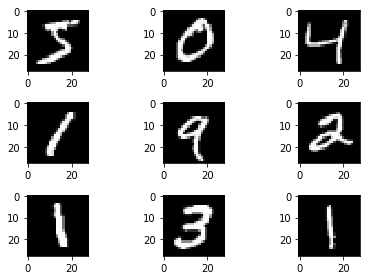

In [3]:
# create a grid of 3x3 images 
for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.tight_layout()

In [4]:
# print the shapes

print('Shape of X_train: '+str(X_train.shape))
print('Shape of y_train: '+str(y_train.shape))
print('Shape of X_test: '+str(X_test.shape))
print('Shape of y_test: '+str(y_train.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (60000,)


7


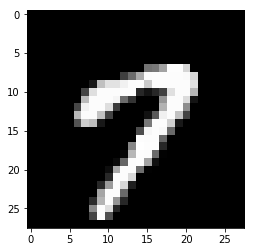

In [5]:
index = 15
print(y_train[index])
plt.imshow(X_train[index], cmap = 'gray');

In [6]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 256
VERBOSE = 1

NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam(lr=0.0008) # optimizer
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.2

In [7]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


One-hot encoding — OHE: In many applications, it is convenient to transform categorical (non-numerical) features into numerical variables. For instance, the categorical feature digit with the value d in [0-9] can be encoded into a binary vector with 10 positions, which always has 0 value, except the d-th position where a 1 is present. This type of representation is called one-hot encoding (OHE) and is very common in data mining when the learning algorithm is specialized for dealing with numerical functions.

In [9]:
# convert class vectors to binary class matrices (one hot encode outputs)
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [10]:
# M_HIDDEN hidden layers 10 outputs

model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

In [11]:
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 170us/step - loss: 0.0622 - acc: 0.9785 - val_loss: 0.0259 - val_acc: 0.9913
Epoch 2/20
48000/48000 [==============================] - 8s 159us/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0190 - val_acc: 0.9940
Epoch 3/20
48000/48000 [==============================] - 7s 151us/step - loss: 0.0186 - acc: 0.9938 - val_loss: 0.0167 - val_acc: 0.9942
Epoch 4/20
48000/48000 [==============================] - 7s 154us/step - loss: 0.0143 - acc: 0.9951 - val_loss: 0.0147 - val_acc: 0.9949
Epoch 5/20
48000/48000 [==============================] - 8s 161us/step - loss: 0.0111 - acc: 0.9963 - val_loss: 0.0134 - val_acc: 0.9955
Epoch 6/20
48000/48000 [==============================] - 7s 149us/step - loss: 0.0089 - acc: 0.9970 - val_loss: 0.0136 - val_acc: 0.9955
Epoch 7/20
48000/48000 [==============================] - 8s 162us/step - loss: 0.0077 - acc: 0.9974 - val_loss: 0.0125 - 

In [12]:
print("Test score:", score[0]*100)
print('Test accuracy:', score[1]*100)

Test score: 1.38175946134
Test accuracy: 99.6399995995


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
10000/10000 [==============================] - 1s 88us/step


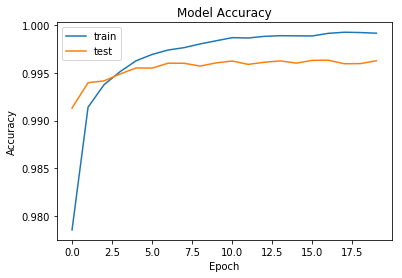

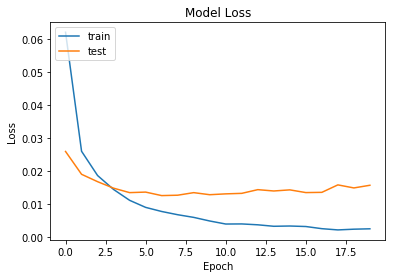

[Test score - 0.013817594613415758
[Test accuracy - 0.9963999959945679


In [13]:
# print the history keys
print (history.history.keys())

# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print ("[Test score - {}".format(scores[0]))
print ("[Test accuracy - {}".format(scores[1]))
